In [10]:

#  Load and Inspect Data
import pandas as pd

# Replace with your exact uploaded filenames
historical_file = "historical_data.csv"
fear_greed_file = "fear_greed_index.csv"

# Load both CSVs
df_trades = pd.read_csv(historical_file)
df_sentiment = pd.read_csv(fear_greed_file)

# Basic info
print("---- HISTORICAL TRADER DATA ----")
print("Rows:", df_trades.shape[0], "Columns:", df_trades.shape[1])
print("Column Names:", df_trades.columns.tolist(), "\n")
print(df_trades.head(3), "\n")

print("---- FEAR-GREED INDEX DATA ----")
print("Rows:", df_sentiment.shape[0], "Columns:", df_sentiment.shape[1])
print("Column Names:", df_sentiment.columns.tolist(), "\n")
print(df_sentiment.head(3), "\n")

#  Data types of each column
print("---- Data Types in Trader Data ----\n")
print(df_trades.dtypes)
print("\n")

#  Show unique/example values for each column (limited to 10)
print("---- Example Values in Each Column ----\n")
for col in df_trades.columns:
    print(f"\n🔹 Column: {col}")
    unique_vals = df_trades[col].unique()
    print("Example values:", unique_vals[:10])
    print("Total unique values:", len(unique_vals))

#  Check for missing values
print("\n---- Missing Values in Trader Data ----\n")
print(df_trades.isnull().sum())


---- HISTORICAL TRADER DATA ----
Rows: 211224 Columns: 16
Column Names: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp'] 

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a9

In [11]:

# Data Cleaning & Merge


import pandas as pd

# Keep only useful columns
df_clean = df_trades[[
    'Account', 'Coin', 'Execution Price', 'Side',
    'Direction', 'Closed PnL', 'Timestamp IST'
]].copy()

#  Convert timestamp to proper datetime
df_clean['Timestamp IST'] = pd.to_datetime(
    df_clean['Timestamp IST'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

#  Create a simple date column for merging
df_clean['Date'] = df_clean['Timestamp IST'].dt.date

#  Clean the Fear-Greed dataset
df_sentiment['date'] = pd.to_datetime(df_sentiment['date']).dt.date
df_sentiment_clean = df_sentiment[['date', 'classification']].copy()
df_sentiment_clean.rename(columns={'classification': 'Market Sentiment'}, inplace=True)

#  Merge both datasets on date
merged_df = pd.merge(df_clean, df_sentiment_clean,
                     left_on='Date', right_on='date', how='left')

#  Drop duplicate date column from right side
merged_df.drop(columns=['date'], inplace=True)

#  Show final result
print(" Merged dataset shape:", merged_df.shape)
print("\nSample merged rows:\n")
print(merged_df.head(10))
print("\nUnique Sentiment labels found:", merged_df['Market Sentiment'].unique())


 Merged dataset shape: (211224, 9)

Sample merged rows:

                                      Account  Coin  Execution Price Side  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769  BUY   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800  BUY   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855  BUY   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874  BUY   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894  BUY   
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9900  BUY   
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9934  BUY   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000  BUY   
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000  BUY   
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000  BUY   

  Direction  Closed PnL       Timestamp IST        Date Market Sentiment  
0       Buy         

In [12]:
#  Check unique values in all categorical columns
categorical_cols = ['Side', 'Direction', 'Coin', 'Market Sentiment']
for col in categorical_cols:
    print(f"\n--- Unique values in '{col}' ---")
    print(merged_df[col].value_counts(dropna=False))

#Check basic statistics for numeric columns
numeric_cols = ['Execution Price', 'Closed PnL']
print("\n--- Summary statistics for numeric columns ---")
print(merged_df[numeric_cols].describe())

#Check how many unique traders and coins there are
print("\nNumber of unique traders (accounts):", merged_df['Account'].nunique())
print("Number of unique coins traded:", merged_df['Coin'].nunique())

# Quick check of missing values
print("\nMissing values per column:")
print(merged_df.isnull().sum())



--- Unique values in 'Side' ---
Side
SELL    108528
BUY     102696
Name: count, dtype: int64

--- Unique values in 'Direction' ---
Direction
Open Long                    49895
Close Long                   48678
Open Short                   39741
Close Short                  36013
Sell                         19902
Buy                          16716
Spot Dust Conversion           142
Short > Long                    70
Long > Short                    57
Auto-Deleveraging                8
Liquidated Isolated Short        1
Settlement                       1
Name: count, dtype: int64

--- Unique values in 'Coin' ---
Coin
HYPE    68005
@107    29992
BTC     26064
ETH     11158
SOL     10691
        ...  
@18         1
@30         1
@25         1
@86         1
@68         1
Name: count, Length: 246, dtype: int64

--- Unique values in 'Market Sentiment' ---
Market Sentiment
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
NaN 

Average Closed PnL per Market Sentiment:
Market Sentiment
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64

Trade Counts per Market Sentiment:
Side                BUY   SELL
Market Sentiment              
Extreme Fear      10935  10465
Extreme Greed     17940  22052
Fear              30270  31567
Greed             24576  25727
Neutral           18969  18717


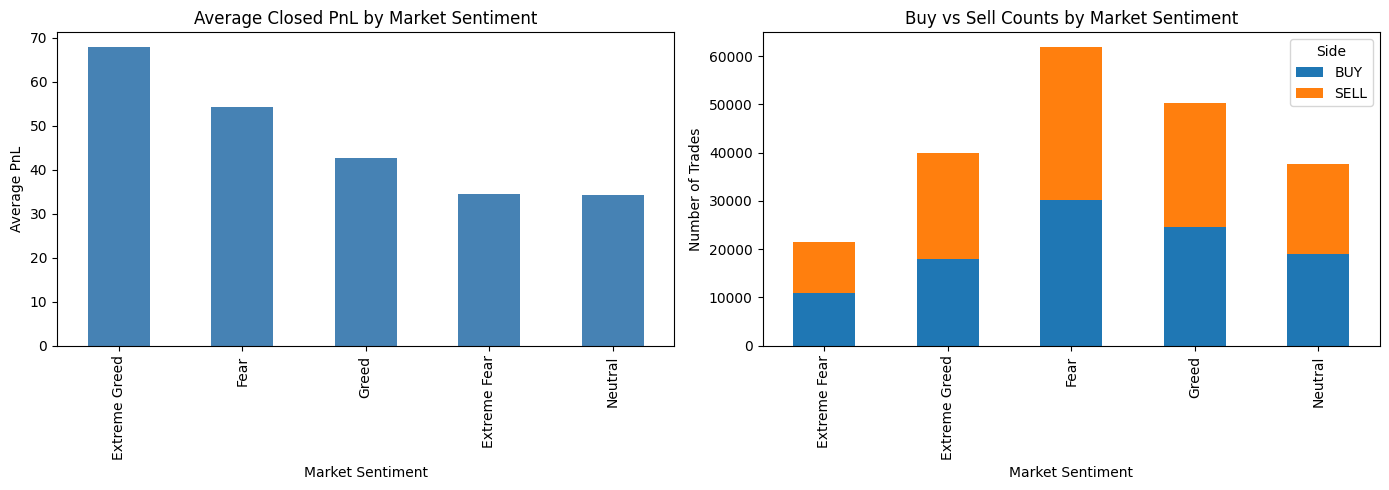

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Average Closed PnL per Market Sentiment
avg_pnl_sentiment = (
    merged_df.groupby('Market Sentiment')['Closed PnL']
    .mean()
    .sort_values(ascending=False)
)
print("Average Closed PnL per Market Sentiment:")
print(avg_pnl_sentiment)

#  Count of Buy/Sell trades per Market Sentiment
trade_counts = (
    merged_df.groupby(['Market Sentiment', 'Side'])
    .size()
    .unstack(fill_value=0)
)
print("\nTrade Counts per Market Sentiment:")
print(trade_counts)

#  Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Average PnL bar chart
avg_pnl_sentiment.plot(
    kind='bar',
    ax=axes[0],
    title='Average Closed PnL by Market Sentiment',
    color='steelblue'
)
axes[0].set_ylabel('Average PnL')

# Buy/Sell distribution bar chart
trade_counts.plot(
    kind='bar',
    stacked=True,
    ax=axes[1],
    title='Buy vs Sell Counts by Market Sentiment'
)
axes[1].set_ylabel('Number of Trades')

plt.tight_layout()
plt.show()


Top 10 Traders by Total Closed PnL:

Account
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23    2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012    1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864    9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1    8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab    8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4    6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd    4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713    4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0    4.030115e+05
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4    3.790954e+05
Name: Closed PnL, dtype: float64

Sample of Trader Sentiment Matrix:

Market Sentiment                            Extreme Fear  Extreme Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012   1247.692214     -42.626810   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    -24.912665      43.22290

<Figure size 1200x600 with 0 Axes>

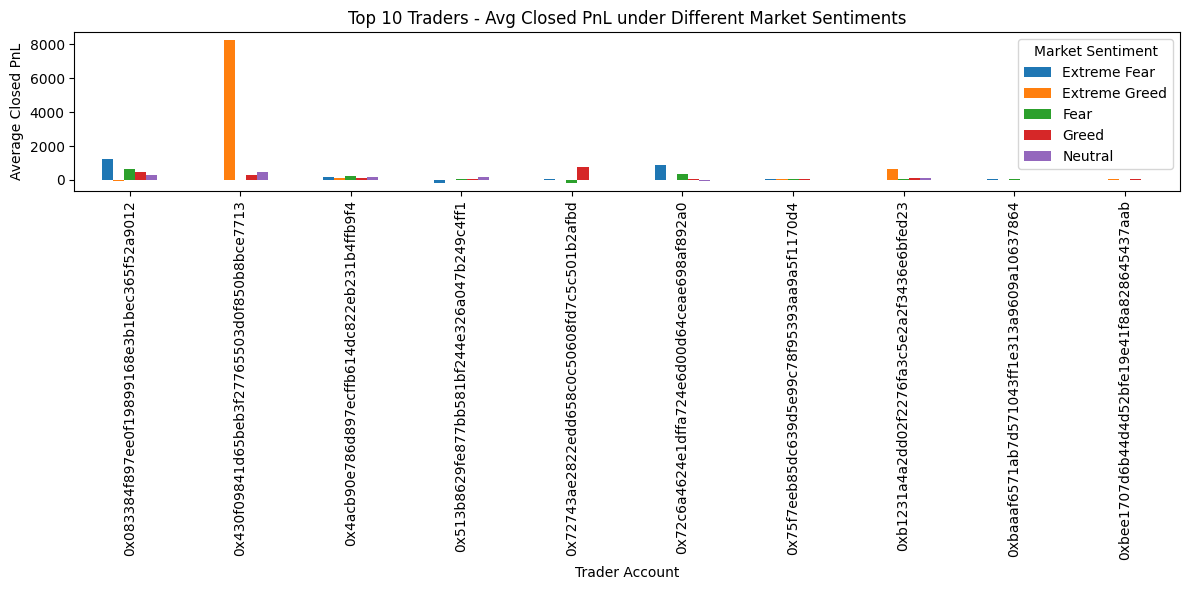

In [14]:
#  Total Closed PnL per trader
trader_pnl = (
    merged_df.groupby('Account')['Closed PnL']
    .sum()
    .sort_values(ascending=False)
)
print("Top 10 Traders by Total Closed PnL:\n")
print(trader_pnl.head(10))

#  Average PnL by Trader vs Market Sentiment
trader_sentiment_pnl = (
    merged_df.groupby(['Account', 'Market Sentiment'])['Closed PnL']
    .mean()
    .unstack()
    .fillna(0)
)
print("\nSample of Trader Sentiment Matrix:\n")
print(trader_sentiment_pnl.head(10))

#  Visualization – Top 10 Trader Performance
top_10_accounts = trader_pnl.head(10).index
top10_pnl = merged_df[merged_df['Account'].isin(top_10_accounts)]

plt.figure(figsize=(12,6))
top10_pnl.groupby(['Account', 'Market Sentiment'])['Closed PnL'].mean().unstack().plot(
    kind='bar', figsize=(12,6)
)
plt.title("Top 10 Traders - Avg Closed PnL under Different Market Sentiments")
plt.ylabel("Average Closed PnL")
plt.xlabel("Trader Account")
plt.legend(title="Market Sentiment")
plt.tight_layout()
plt.show()


Summary of Performance by Market Sentiment:

                  Avg Closed PnL  Total Closed PnL  Total Trades
Market Sentiment                                                
Extreme Greed              67.89        2715171.31         39992
Fear                       54.29        3357155.44         61837
Greed                      42.74        2150129.27         50303
Extreme Fear               34.54         739110.25         21400
Neutral                    34.31        1292920.68         37686


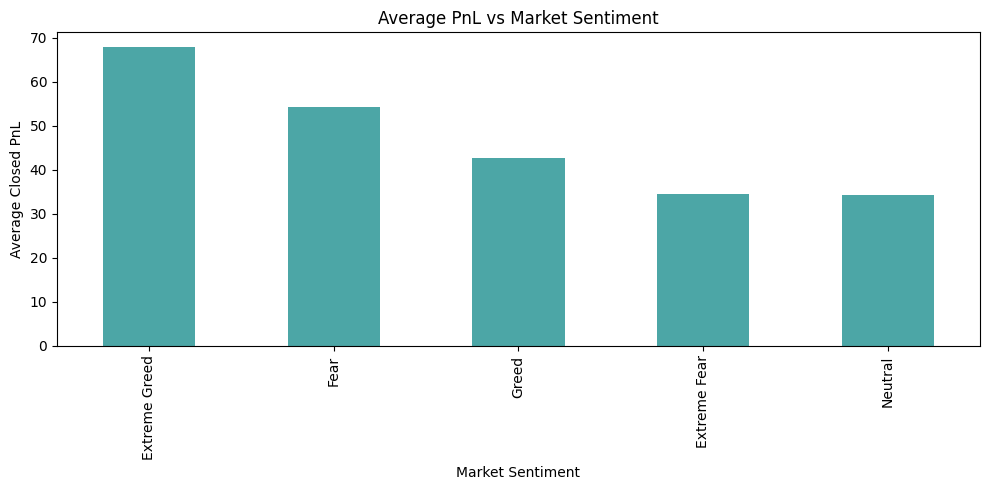


Summary CSV exported: sentiment_performance_summary.csv


In [15]:
#  Summary of sentiment-level PnL and trade counts
summary_df = merged_df.groupby('Market Sentiment').agg({
    'Closed PnL': ['mean', 'sum'],
    'Side': 'count'
}).round(2)
summary_df.columns = ['Avg Closed PnL', 'Total Closed PnL', 'Total Trades']
summary_df = summary_df.sort_values('Avg Closed PnL', ascending=False)
print("Summary of Performance by Market Sentiment:\n")
print(summary_df)

# Combined visualization
fig, ax1 = plt.subplots(figsize=(10,5))
summary_df['Avg Closed PnL'].plot(kind='bar', ax=ax1, color='teal', alpha=0.7)
ax1.set_ylabel('Average Closed PnL')
ax1.set_xlabel('Market Sentiment')
ax1.set_title('Average PnL vs Market Sentiment')

plt.tight_layout()
plt.show()

#  Export summarized results to CSV (optional for submission)
summary_df.to_csv('sentiment_performance_summary.csv', index=True)
print("\nSummary CSV exported: sentiment_performance_summary.csv")
